CONV2D-LENET FOR MNIST TO RECOGNIZE HANDWRITTING DIGITS

In [1]:
!pip install tensorflow==1.15

In [0]:
import tensorflow as tf

In [3]:
tf.config.experimental.list_physical_devices(device_type=None) 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


MODEL

In [0]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        #print('# CONV => RELU => POOL')
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape,activation='relu'))
        #model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #print('# CONV => RELU => POOL')
        model.add(Conv2D(50, kernel_size=5, border_mode="same",activation='relu'))
        #model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #print(' # Flatten => RELU layers')
        model.add(Flatten())
        model.add(Dense(500,activation='relu'))
        #model.add(Dense(500))
        #model.add(Activation("relu"))
        # a softmax classifier
        model.add(Dense(classes,activation='softmax'))
        #model.add(Activation("softmax"))
        return model

DATASET MNIST OF IMAGES WITH 28X28 PIXELS

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NORMALIZE

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

IMAGE FORMAT

In [8]:
K.set_image_data_format('channels_first')
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


LABELS FROM CATEGORICAL TO NUMERICAL VALUES

In [0]:
nb_classes=10
class_names=list(range(nb_classes))

In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [0]:
#MODEL ARCHITECTURE
nhidden=128
dropout=0.25
lr =0.0002

MODEL

In [12]:
model = LeNet.build(input_shape=(1,28,28), classes=nb_classes)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

Loss Function

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr),
              metrics=['accuracy'])


TRAINING

In [0]:
epochs = 5
BATCH_SIZE = 128

In [16]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, nb_epoch=epochs,verbose=1, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 106s 2ms/step - loss: 0.3929 - accuracy: 0.8937 - val_loss: 0.1233 - val_accuracy: 0.9647
Epoch 2/5
48000/48000 [==============================] - 105s 2ms/step - loss: 0.1027 - accuracy: 0.9697 - val_loss: 0.0767 - val_accuracy: 0.9779
Epoch 3/5
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0630 - val_accuracy: 0.9815
Epoch 4/5
48000/48000 [==============================] - 105s 2ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0566 - val_accuracy: 0.9839
Epoch 5/5
48000/48000 [==============================] - 105s 2ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0511 - val_accuracy: 0.9843


In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


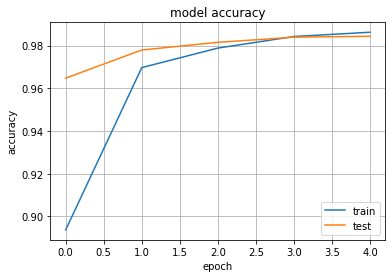

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.grid(True)
plt.show()

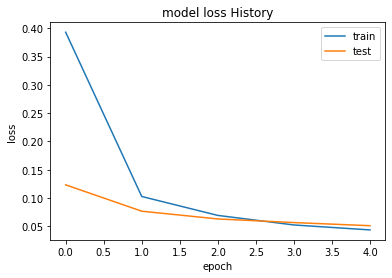

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

MODEL EVALUATION

In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0]*100)
print('Test accuracy:', score[1]*100)

10000/10000 [==============================] - 8s 766us/step
Test score: 3.788638093601912
Test accuracy: 98.79000186920166


MODEL PREDICTION

[1.5495523e-08 2.1192591e-07 1.1332991e-05 2.8751741e-04 8.6183710e-10
 1.5057579e-07 2.8024057e-12 9.9969590e-01 3.2076244e-07 4.5720003e-06]
7
7


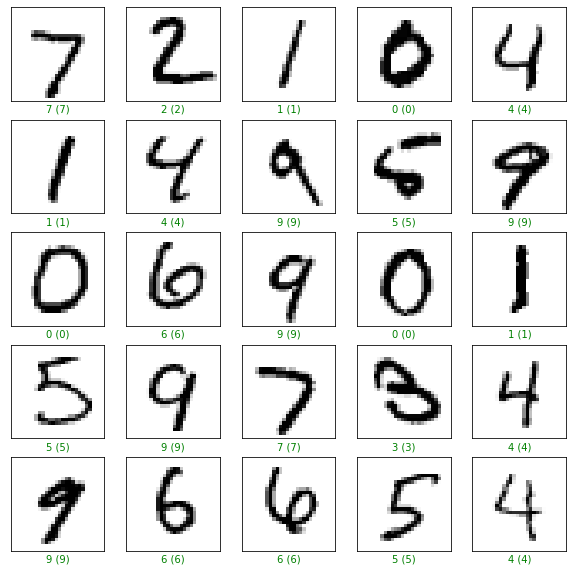

<Figure size 432x288 with 0 Axes>

In [23]:
predictions = model.predict(X_test)

print(predictions[0])

max= np.argmax(predictions[0])
print(max)

tt=y_test[0]
print(tt)

# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('False')
    plt.imshow(X_test[i][0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
plt.show()
plt.savefig("/content/mnist-hadnwrite.pdf")